In [8]:
import os

from dataset import TraceDataset

import attack as wfpattack
import numpy as np
import torch

ds_root = "./data"
attack_name = "RF"
model_dir = f""
data_dir = os.path.join(model_dir, "data")
assert os.path.exists(model_dir)
raw_ds = TraceDataset("undefend", ds_root)
raw_ds.load_cell_level()
num_calsses = raw_ds.num_classes()
attack = wfpattack.get_attack(attack_name)(0, num_calsses, 0)
attack.init_model()

41 70
8 74
77 0
10 37
62 11
59 18
101 9
70 36
104 70


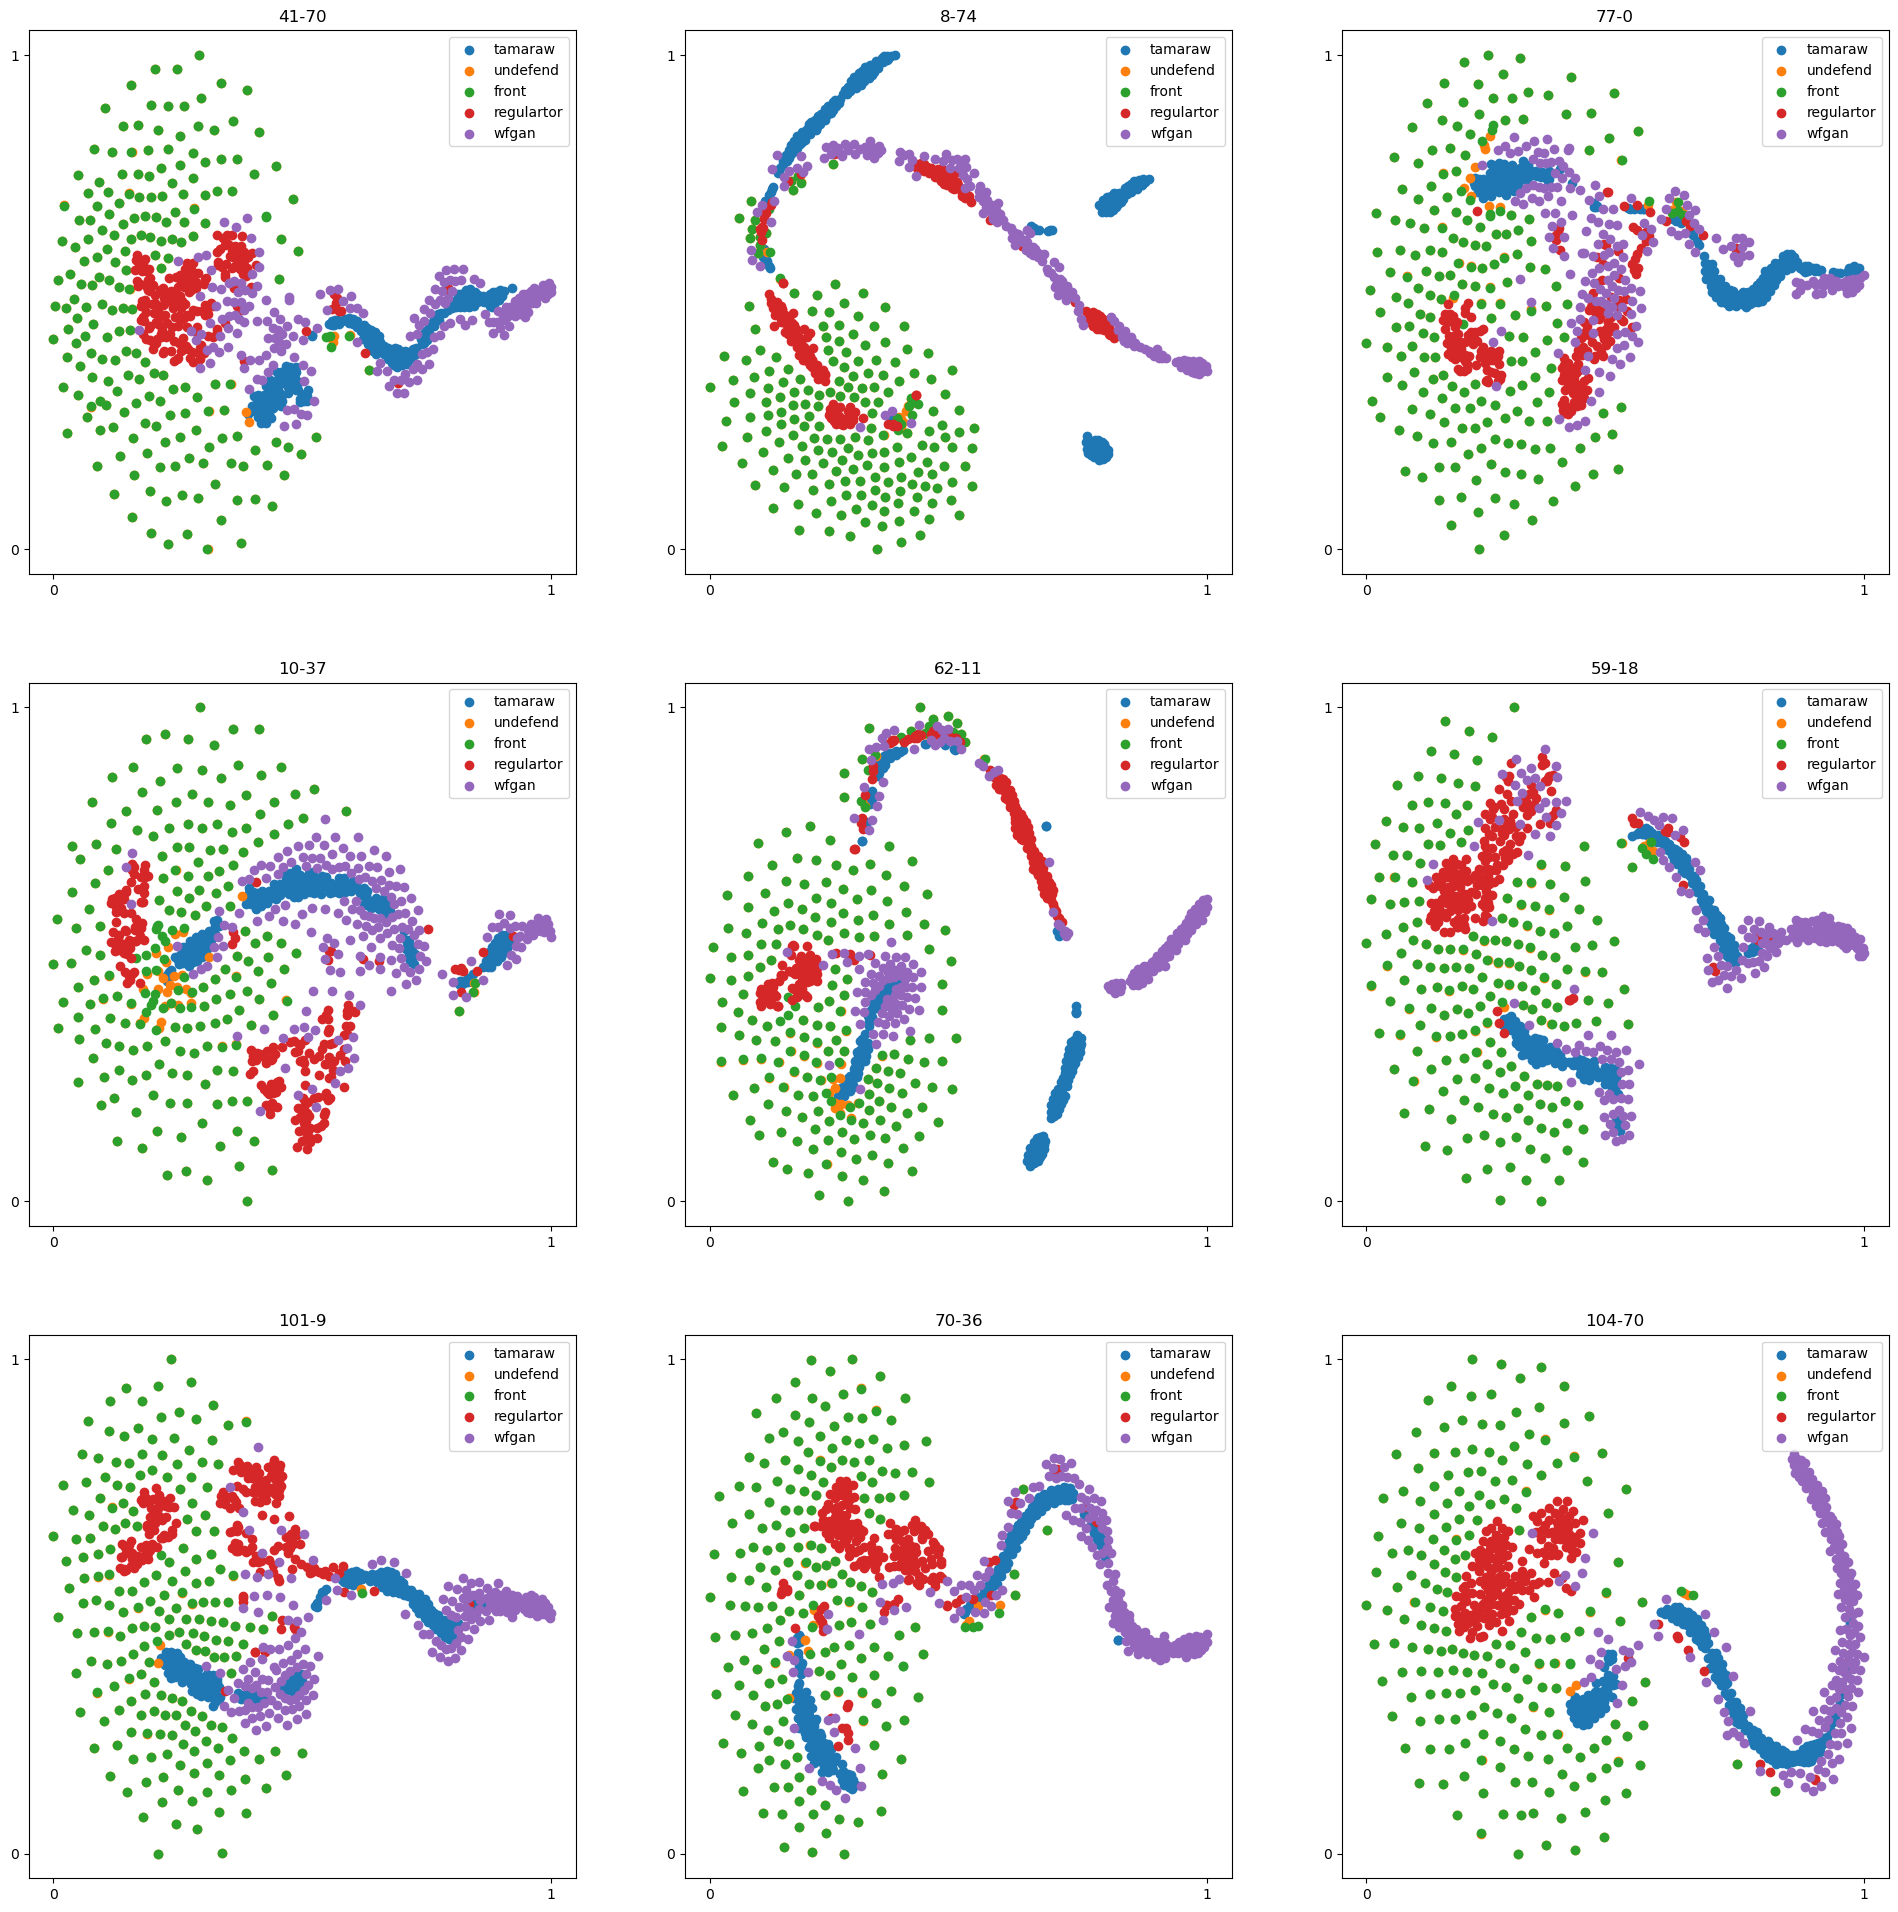

In [43]:
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(24, 24))
for i in range(9):
    class_idx1 = random.randint(0, num_calsses - 1)
    class_idx2 = random.randint(0, num_calsses - 1)
    print(class_idx1, class_idx2)
    class_slice1 = raw_ds[:][1] == class_idx1
    class_slice2 = raw_ds[:][1] == class_idx2
    class_slice = class_slice1 | class_slice2
    class_len = len(raw_ds[class_slice])
    ds_dict = {
        path.split(".")[0]: np.load(os.path.join(data_dir, path))
        for path in os.listdir(data_dir)
        if "slice" not in path
    }
    ds_dict = {
        name: {"traces": ds["traces"][class_slice], "labels": ds["labels"][class_slice]}
        for name, ds in ds_dict.items()
    }
    X = np.concatenate([ds["traces"] for name, ds in ds_dict.items()])
    X = X.reshape(X.shape[0], -1)
    from sklearn.manifold import TSNE

    tsne = TSNE()
    tsne_out = tsne.fit_transform(X)

    plt.subplot(3, 3, i + 1)

    x_min, x_max = np.min(tsne_out, 0), np.max(tsne_out, 0)
    data = (tsne_out - x_min) / (x_max - x_min)

    color = [
        (1, 0.9, 0),
        (1, 0, 0),
        (1, 0.5, 0),
        (1, 0.7, 0),
        (0, 0.9, 1),
        (0, 0, 1),
        (0, 0.5, 1),
        (0, 0.7, 1),
    ]
    start_idx = 0
    for i, name in enumerate(ds_dict.keys()):
        end_idx = start_idx + len(ds_dict[name]["traces"])
        plt.scatter(
            data[start_idx:end_idx, 0], data[start_idx:end_idx, 1], label=name.split("_")[0]
        )
        start_idx = end_idx
    plt.xticks([0, 1])
    plt.yticks([0, 1])
    plt.legend()
    plt.title(f"{class_idx1}-{class_idx2}")
plt.show()